In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df= "Busheling No1 Alabama.xlsx"
df2= "Busheling No1 Chicago.xlsx"
df3= "Shredded Auto Alabama.xlsx"
df4= "Shredded Auto Chicago.xlsx"
dfs=[df,df2,df3,df4]

In [3]:
def get_estado_type(dataframe):
    string_a_usar=dataframe.columns[1]
    info_a_usar=string_a_usar.split( )
    tipo=info_a_usar[0:2]
    s=" "
    tipo_final=s.join(tipo)
    estado=info_a_usar[2]
    
    return tipo_final,estado



In [4]:
def format_df(dataframe2,tipo_final,estado):
    if "Unnamed: 5" in dataframe2.columns:
        dataframe2=dataframe2.drop(["Unnamed: 5"],axis=1)
    dataframe2['Tipo']= tipo_final
    dataframe2['Estado']=estado
    dataframe2 = dataframe2.iloc[:-4]  
    return dataframe2

In [5]:
lista_final=[]
for i in dfs:
    df_header0 = pd.read_excel(i, header=0)

    tipo_final,estado=get_estado_type(df_header0)

    df_header10 = pd.read_excel(i, header=10)
    
    final_1=format_df(df_header10,tipo_final,estado)
    lista_final.append(final_1)

In [6]:
df_final = pd.concat(lista_final, ignore_index=True)
df_final


,Date,Low,Mid,High,Mid Change %,Tipo,Estado
0,12/3/2025,470.0,470.0,470.0,0.068182,Busheling No1,Alabama
1,7/2/2025,440.0,440.0,440.0,0.100000,Busheling No1,Alabama
2,9/1/2025,400.0,400.0,400.0,0.052632,Busheling No1,Alabama
3,10/12/2024,380.0,380.0,380.0,-0.025641,Busheling No1,Alabama
4,11/11/2024,390.0,390.0,390.0,-0.025000,Busheling No1,Alabama
...,...,...,...,...,...,...,...
1128,7/5/1993,119.0,120.0,121.0,-0.008264,Shredded Auto,Chicago
1129,1/4/1993,121.0,121.0,121.0,-0.024194,Shredded Auto,Chicago
1130,1/2/1993,124.0,124.0,124.0,0.092511,Shredded Auto,Chicago
1131,8/1/1993,113.0,113.5,114.0,-0.004386,Shredded Auto,Chicago


In [7]:
df_final.columns

Index(['Date', 'Low', 'Mid', 'High', 'Mid Change %', 'Tipo', 'Estado'], dtype='object')

In [8]:
z=df_final['Low']==df_final['Mid']
1132-z.sum()

83

In [9]:
z=df_final['Mid']==df_final['High']
1132-z.sum()

83

In [10]:
def calcular_medidas_estadisticas(dataframe):
    medidas_estadisticas=dataframe.describe()
    valores_renglon=[]
    rango_renglon=[]
    varianza_renglon=[]

    for i in medidas_estadisticas.columns:
        valor=dataframe['Low'].mode()
        valores_renglon.append(valor[0])
        rango=medidas_estadisticas[i]['max']-medidas_estadisticas[i]['min']
        rango_renglon.append(rango)
        varianza=medidas_estadisticas[i]['std']**2
        varianza_renglon.append(varianza)


        

    new_row = {'Low': valores_renglon[0], 'Mid': valores_renglon[1], 'High': valores_renglon[2],'Mid Change %': valores_renglon[3]}
    new_row2 = {'Low': rango_renglon[0], 'Mid': rango_renglon[1], 'High': rango_renglon[2],'Mid Change %': rango_renglon[3]}
    new_row3 = {'Low': varianza_renglon[0], 'Mid': varianza_renglon[1], 'High': varianza_renglon[2],'Mid Change %': varianza_renglon[3]}

    medidas_estadisticas.loc['Mode'] = new_row
    medidas_estadisticas.loc['Rango'] = new_row2
    medidas_estadisticas.loc['Varianza'] = new_row3


    return medidas_estadisticas


In [11]:
estadistica_cuantitativa=calcular_medidas_estadisticas(df_final)
estadistica_cuantitativa

,Low,Mid,High,Mid Change %
count,1133.000000,1133.000000,1133.000000,1129.000000
mean,294.710503,294.765225,294.819947,0.008143
std,134.315136,134.252207,134.189562,0.106873
min,77.000000,77.500000,78.000000,-0.478417
25%,164.000000,164.000000,164.000000,-0.043478
50%,285.000000,285.000000,285.000000,0.000000
75%,388.000000,388.000000,388.000000,0.051020
max,890.000000,890.000000,890.000000,1.080000
Mode,380.000000,380.000000,380.000000,380.000000
Rango,813.000000,812.500000,812.000000,1.558417


In [12]:
def estadistica_categorica(dataframe):
    cat_vars = ['Tipo', 'Estado']

    for var in cat_vars:
        print(f"\n Frecuencias para: {var}")
        freq_abs = dataframe[var].value_counts()
        freq_rel = dataframe[var].value_counts(normalize=True) * 100
        freq_table = pd.DataFrame({'Frecuencia Absoluta': freq_abs, 'Frecuencia Relativa (%)': freq_rel.round(2)})
        print(freq_table)
        moda_estado = dataframe['Estado'].mode()[0]
    print(f"Moda de Estado: {moda_estado}")

In [13]:
categorica=estadistica_categorica(df_final)
categorica


 Frecuencias para: Tipo
               Frecuencia Absoluta  Frecuencia Relativa (%)
Tipo                                                       
Busheling No1                  573                    50.57
Shredded Auto                  560                    49.43

 Frecuencias para: Estado
         Frecuencia Absoluta  Frecuencia Relativa (%)
Estado                                               
Chicago                  858                    75.73
Alabama                  275                    24.27
Moda de Estado: Chicago


In [14]:
def make_plots_cuantitativas(dataframe):
    df = dataframe.copy()

    # Seleccionar  variables cuantitativas
    quant_vars = ['Low', 'Mid', 'High', 'Mid Change %']

    # ===== 1. Boxplots (cuartiles y outliers) =====
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(quant_vars):
        plt.subplot(1, len(quant_vars), i+1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()

    # ===== 2. Histogramas (distribución, simetría/asimetría) =====
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(quant_vars):
        plt.subplot(2, 2, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histograma: {col}')
    plt.tight_layout()
    plt.show()

    # ===== 3. Análisis de correlación - Heatmap =====
    plt.figure(figsize=(8, 6))
    corr = df[quant_vars].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Mapa de calor de correlaciones')
    plt.show()

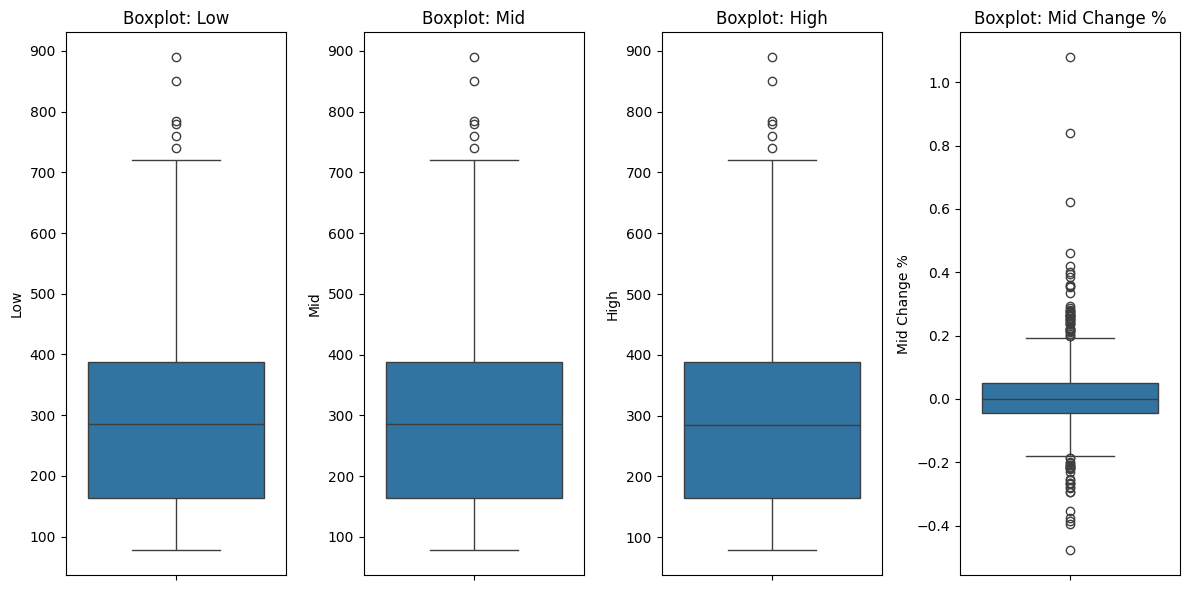

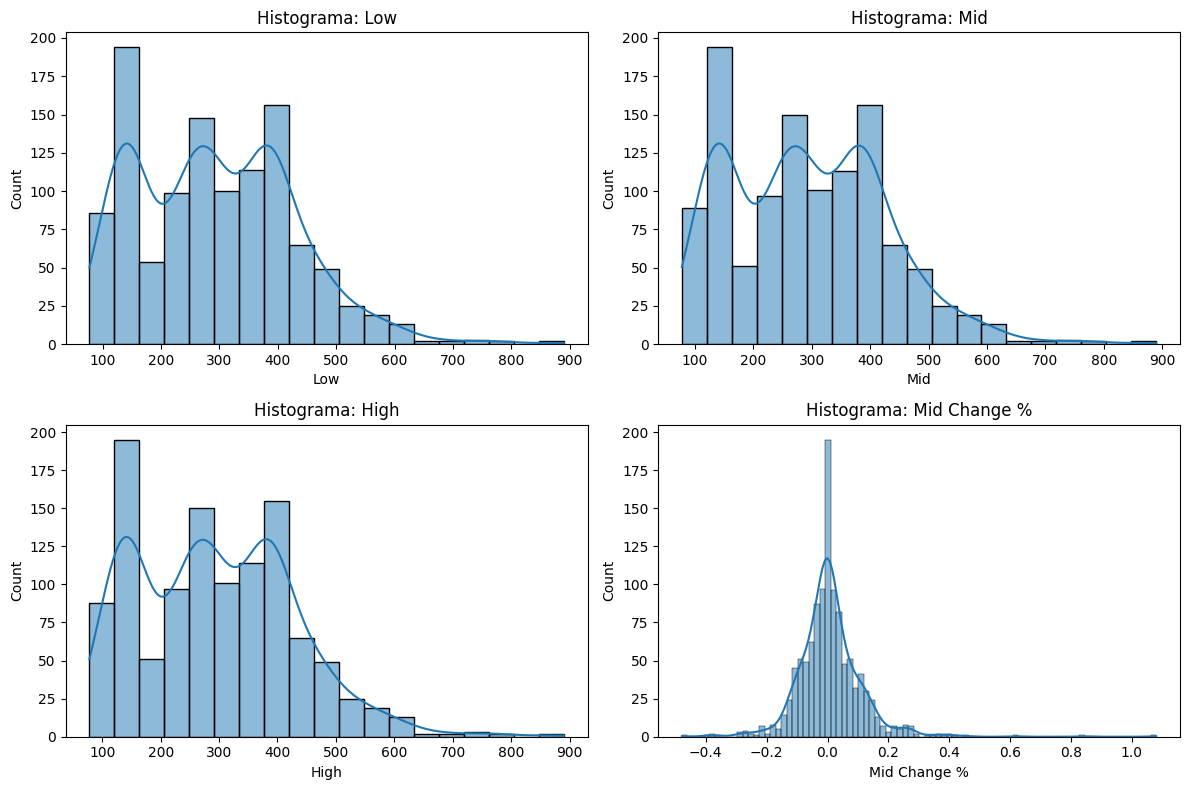

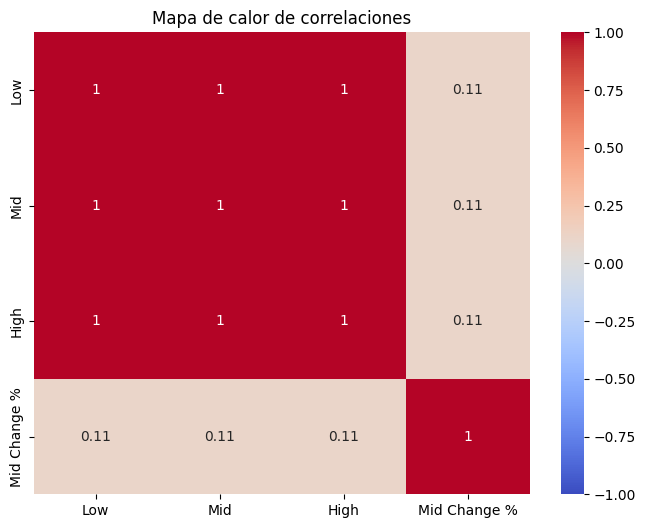

In [15]:
make_plots_cuantitativas(df_final)

Estos analisis no tienen snentido ya que las variables presentan casi los mismos valores, por lo que no tiene sentido analizarlas de manera estadistica, de igual forma la manera en la que se estructuraron los datos no es la ideal y por lo tanto abajo se desarrollan de mejor manera las tablas para poder ver correlacion entre los precios de la chatarra

In [16]:
def make_plots_cualitativas(dataframe):
    df2=dataframe.copy()
    cat_vars = ['Tipo', 'Estado']

    for var in cat_vars:
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        # Diagrama de barras
        sns.countplot(x=var, data=df2, ax=axs[0], palette='pastel')
        axs[0].set_title(f'Distribución de {var}')
        axs[0].tick_params(axis='x', rotation=45)

        # Diagrama de pastel
        df2[var].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colors=sns.color_palette('pastel'))
        axs[1].set_ylabel('')
        axs[1].set_title(f'Proporción de {var}')

        plt.tight_layout()
        plt.show()


C:\Users\Gael\AppData\Local\Temp\ipykernel_17940\1690146337.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df2, ax=axs[0], palette='pastel')


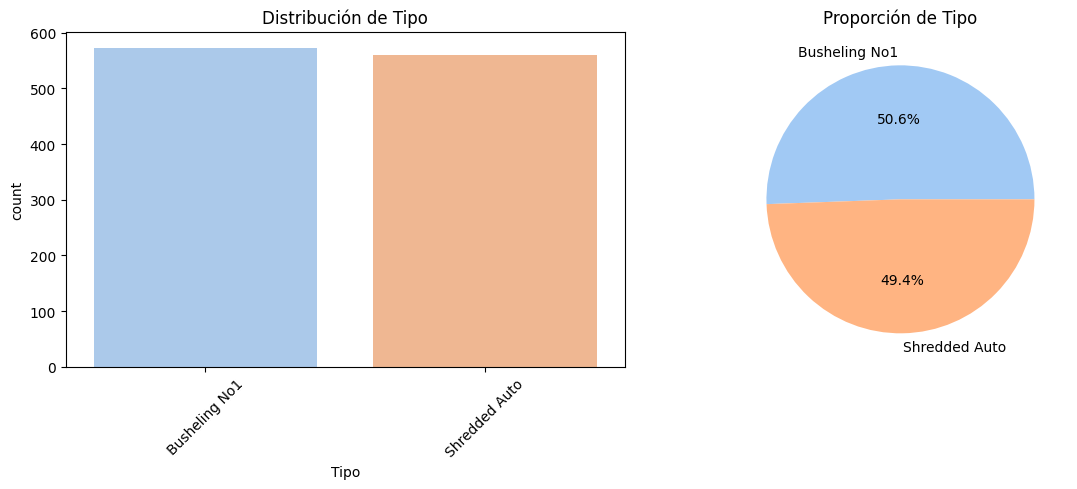

C:\Users\Gael\AppData\Local\Temp\ipykernel_17940\1690146337.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df2, ax=axs[0], palette='pastel')


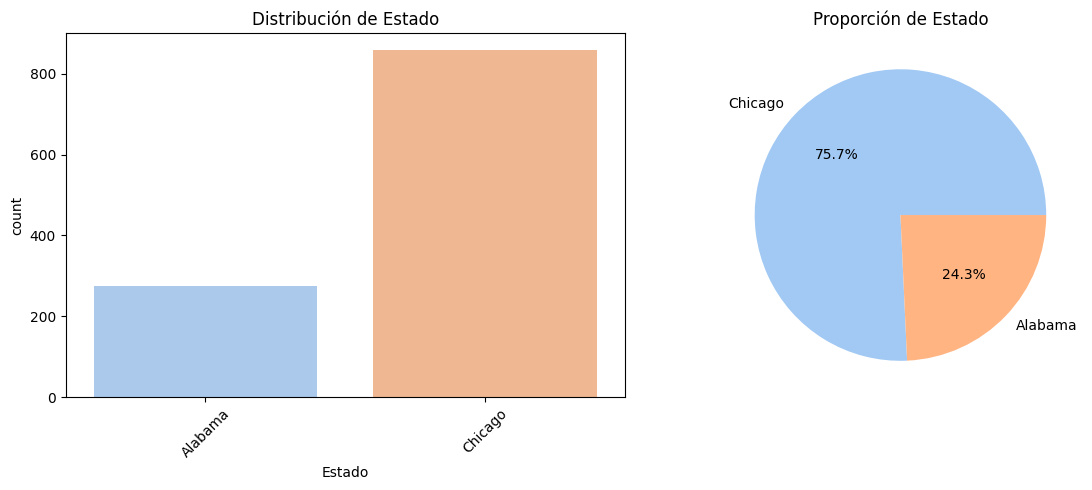

In [17]:

make_plots_cualitativas(df_final)

In [18]:
df_final.isna().sum()

Date            0
Low             0
Mid             0
High            0
Mid Change %    4
Tipo            0
Estado          0
dtype: int64

In [19]:
def pivot(dataframe, estado=None):
    dataframe['Date'] = pd.to_datetime(dataframe['Date'], format='%d/%m/%Y')
    dataframe['Mes'] = dataframe['Date'].dt.to_period('M').dt.to_timestamp()
    df_reduced = dataframe[['Mes', 'Tipo', 'Estado', 'Mid']]

    if estado:
        
        df_reduced = df_reduced[df_reduced['Estado'] == estado]
    df_pivot = df_reduced.pivot_table(
        index='Mes',
        columns=['Estado', 'Tipo'],
        values='Mid'
    ).reset_index()

    return df_pivot

In [20]:
alabama=pivot(df_final,"Alabama")
alabama


Estado        Mes       Alabama              
Tipo              Busheling No1 Shredded Auto
0      2013-08-01         417.0         380.0
1      2013-09-01         410.0         372.0
2      2013-10-01         403.0         367.0
3      2013-11-01         432.0         400.0
4      2013-12-01         442.0         415.0
..            ...           ...           ...
131    2024-11-01         390.0         390.0
132    2024-12-01         380.0         380.0
133    2025-01-01         400.0         400.0
134    2025-02-01         440.0         440.0
135    2025-03-01         470.0         463.0

[136 rows x 3 columns]

In [21]:
chicago=pivot(df_final,"Chicago")
chicago


Estado        Mes       Chicago              
Tipo              Busheling No1 Shredded Auto
0      1993-01-01         116.0        113.75
1      1993-02-01         125.0        124.00
2      1993-03-01         124.0           NaN
3      1993-04-01         120.0        121.00
4      1993-05-01           NaN        120.00
..            ...           ...           ...
350    2024-11-01         380.0        370.00
351    2024-12-01         380.0        360.00
352    2025-01-01         400.0        380.00
353    2025-02-01         450.0        430.00
354    2025-03-01         480.0        460.00

[355 rows x 3 columns]

In [22]:
import plotly.express as px
import pandas as pd

# Ensure Mes is a datetime index
df_long = alabama.copy() # z is a dataframe

df_long.columns = ['Mes'] + [' - '.join(col).strip() for col in df_long.columns[1:]]
df_melted = df_long.melt(id_vars='Mes', var_name='Producto', value_name='Precio')

# Plotly interactive plot
fig = px.line(
    df_melted,
    x='Mes',
    y='Precio',
    color='Producto',
    title='Precio Mensual de Chatarra en Alabama',
    markers=True
)

fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Precio (USD / tonelada bruta)',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


Historico , como cambia el precio mensual de la chatarra en alabama conforme pasa el tiempo.

In [23]:
# Ensure Mes is a datetime index
df_long = chicago.copy() # z is a dataframe

df_long.columns = ['Mes'] + [' - '.join(col).strip() for col in df_long.columns[1:]]
df_melted = df_long.melt(id_vars='Mes', var_name='Producto', value_name='Precio')

# Plotly interactive plot
fig = px.line(
    df_melted,
    x='Mes',
    y='Precio',
    color='Producto',
    title='Precio Mensual de Chatarra en Chicago',
    markers=True
)

fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Precio (USD / tonelada bruta)',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()

# Mexico lo hacemos por aparte 

In [24]:
df5="COPYOF~1.xls"

In [25]:
mexico=pd.read_excel(df5)
mexico = mexico.rename(columns={'Chatarra Monterrey': 'Busheling No1 Monterrey'})
tipo_final_mexico, estado_mexico= get_estado_type(mexico)
df_header_mexico = pd.read_excel(df5, header=9)
final_1=format_df(df_header_mexico,tipo_final,estado)
df_mexico=format_df(final_1,tipo_final_mexico,estado_mexico)
df_mexico

C:\Users\Gael\AppData\Local\Temp\ipykernel_17940\2715452293.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gael\AppData\Local\Temp\ipykernel_17940\2715452293.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Low,Mid,High,Mid Change %,Tipo,Estado
0,18/3/2025,7100.0,7100.0,7100.0,0.028986,Busheling No1,Monterrey
1,11/3/2025,6900.0,6900.0,6900.0,0.029851,Busheling No1,Monterrey
2,4/3/2025,6700.0,6700.0,6700.0,0.000000,Busheling No1,Monterrey
3,25/2/2025,6700.0,6700.0,6700.0,0.000000,Busheling No1,Monterrey
4,18/2/2025,6700.0,6700.0,6700.0,0.046875,Busheling No1,Monterrey
...,...,...,...,...,...,...,...
450,27/7/2016,5000.0,5000.0,5000.0,0.000000,Busheling No1,Monterrey
451,20/7/2016,5000.0,5000.0,5000.0,0.041667,Busheling No1,Monterrey
452,13/7/2016,4800.0,4800.0,4800.0,-0.040000,Busheling No1,Monterrey
453,6/7/2016,5000.0,5000.0,5000.0,0.000000,Busheling No1,Monterrey


In [26]:
estadistica_cuantitativa_mexico=calcular_medidas_estadisticas(df_mexico)
estadistica_cuantitativa_mexico

,Low,Mid,High,Mid Change %
count,4.550000e+02,4.550000e+02,4.550000e+02,455.000000
mean,7.101154e+03,7.101154e+03,7.101154e+03,0.001260
std,2.228301e+03,2.228301e+03,2.228301e+03,0.031108
min,3.900000e+03,3.900000e+03,3.900000e+03,-0.193370
25%,5.575000e+03,5.575000e+03,5.575000e+03,-0.004368
50%,6.400000e+03,6.400000e+03,6.400000e+03,0.000000
75%,8.000000e+03,8.000000e+03,8.000000e+03,0.014389
max,1.365000e+04,1.365000e+04,1.365000e+04,0.101266
Mode,6.200000e+03,6.200000e+03,6.200000e+03,6200.000000
Rango,9.750000e+03,9.750000e+03,9.750000e+03,0.294636


In [27]:
categorica=estadistica_categorica(df_mexico)
categorica


 Frecuencias para: Tipo
               Frecuencia Absoluta  Frecuencia Relativa (%)
Tipo                                                       
Busheling No1                  455                    100.0

 Frecuencias para: Estado
           Frecuencia Absoluta  Frecuencia Relativa (%)
Estado                                                 
Monterrey                  455                    100.0
Moda de Estado: Monterrey


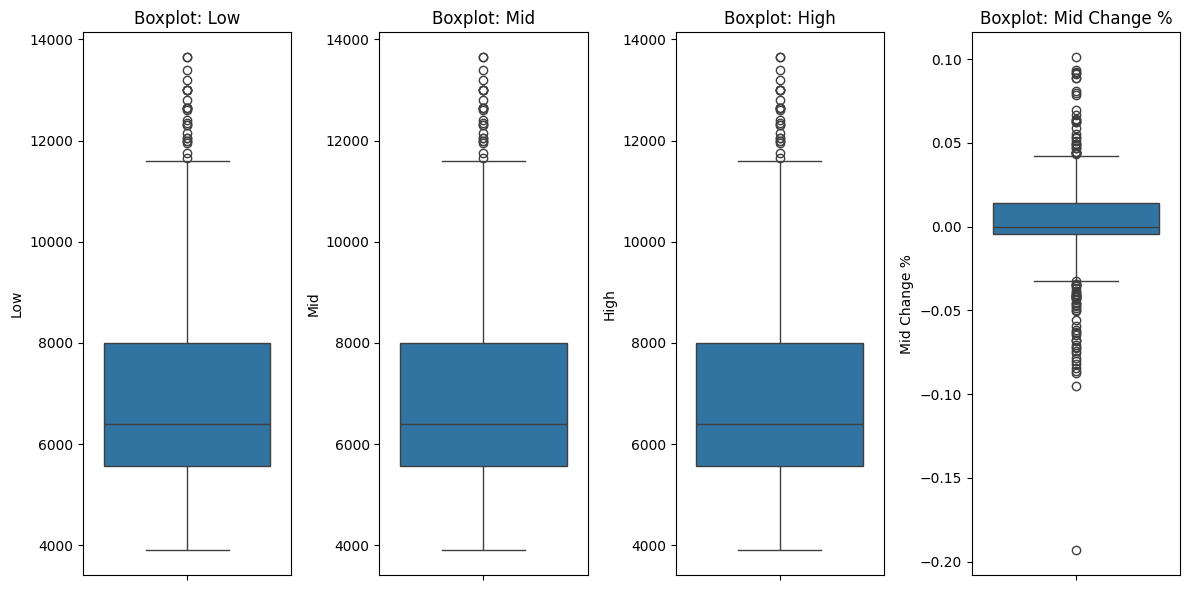

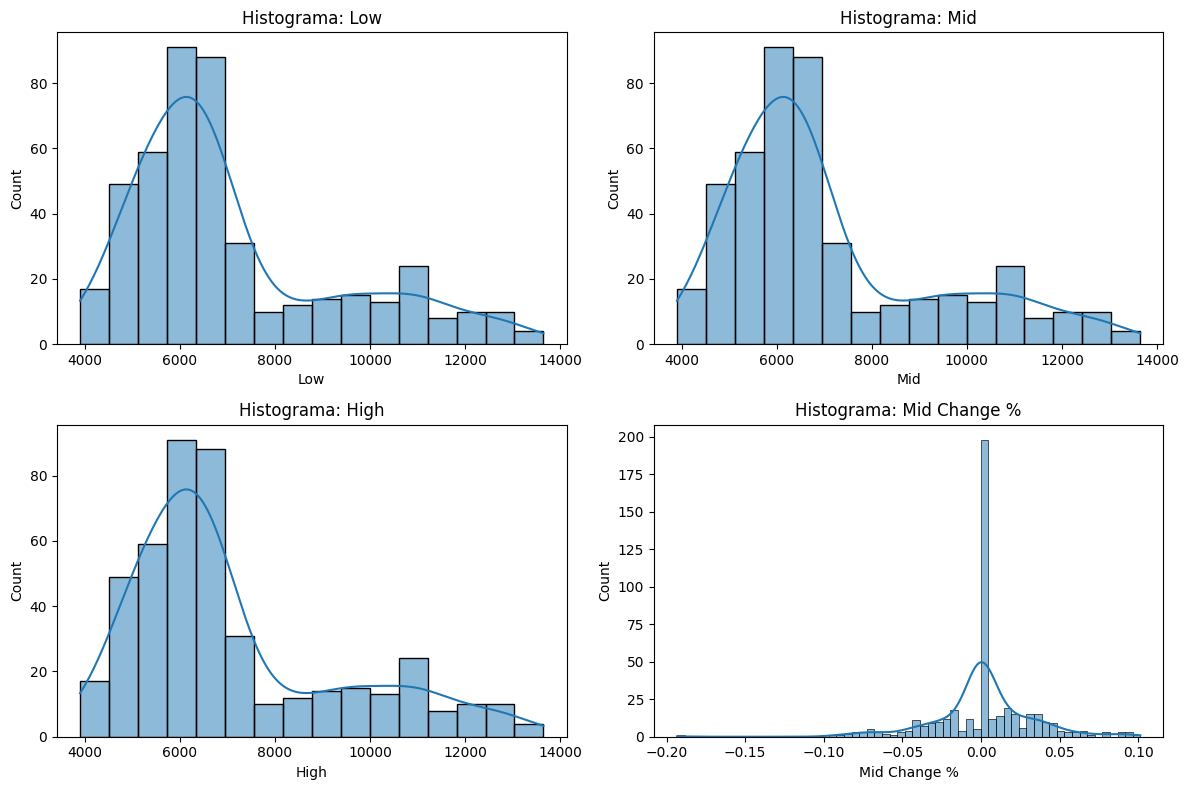

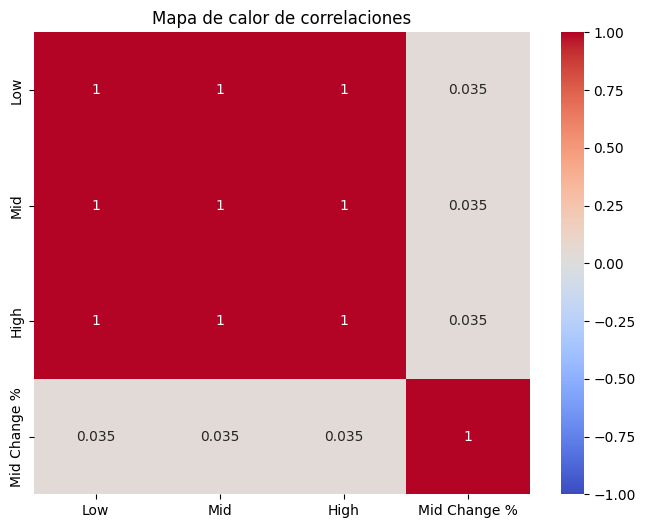

In [28]:
make_plots_cuantitativas(df_mexico)


MIsmo caso que el anterior se deben reestructurar mejor los datos

In [29]:
def pivot_mexico(dataframe, estado=None, tipo_cambio=20):
    # Convert Date to datetime
    dataframe['Date'] = pd.to_datetime(dataframe['Date'], format='%d/%m/%Y')
    
    # Create 'Mes' as first day of the month
    dataframe['Mes'] = dataframe['Date'].dt.to_period('M').dt.to_timestamp()
    
    # Convert prices from MXN to USD
    dataframe['Mid_USD'] = dataframe['Mid'] / tipo_cambio

    # Select relevant columns
    df_reduced = dataframe[['Mes', 'Tipo', 'Estado', 'Mid_USD']]

    # Filter by estado if specified
    if estado:
        df_reduced = df_reduced[df_reduced['Estado'] == estado]

    # Pivot to get structure: (Mes, [Estado, Tipo]) → Mid_USD
    df_pivot = df_reduced.pivot_table(
        index='Mes',
        columns=['Estado', 'Tipo'],
        values='Mid_USD',
        aggfunc='mean'  # Weekly data aggregated monthly
    ).reset_index()

    return df_pivot


In [30]:
mexico_month=pivot_mexico(df_mexico)
mexico_month

C:\Users\Gael\AppData\Local\Temp\ipykernel_17940\3241853027.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gael\AppData\Local\Temp\ipykernel_17940\3241853027.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gael\AppData\Local\Temp\ipykernel_17940\3241853027.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Estado,Mes,Monterrey
Tipo,,Busheling No1
0,2016-06-01,250.00
1,2016-07-01,247.50
2,2016-08-01,270.00
3,2016-09-01,235.00
4,2016-10-01,202.50
...,...,...
101,2024-11-01,326.25
102,2024-12-01,313.00
103,2025-01-01,298.75


In [31]:
# Ensure Mes is a datetime index
df_long = mexico_month.copy() # z is a dataframe

df_long.columns = ['Mes'] + [' - '.join(col).strip() for col in df_long.columns[1:]]
df_melted = df_long.melt(id_vars='Mes', var_name='Producto', value_name='Precio')

# Plotly interactive plot
fig = px.line(
    df_melted,
    x='Mes',
    y='Precio',
    color='Producto',
    title='Precio Mensual de Chatarra en Monterrey',
    markers=True
)

fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Precio (USD / tonelada bruta)',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


# Mineral de Hierro China

In [32]:
df6="COPYOF~1-1.xls"
mineral=pd.read_excel(df6)
tipo_mineral, estado_mineral= get_estado_type(mineral)
df_header_mexico = pd.read_excel(df6,header=9)
china=format_df(df_header_mexico,tipo_mineral,estado_mineral)
china

,Date,Low,Mid,High,Mid Change %,Tipo,Estado
0,19/3/2025,101.35,101.35,101.35,-0.017355,Iron Ore,China
1,18/3/2025,103.14,103.14,103.14,0.001943,Iron Ore,China
2,17/3/2025,102.94,102.94,102.94,-0.020738,Iron Ore,China
3,14/3/2025,105.12,105.12,105.12,0.021078,Iron Ore,China
4,13/3/2025,102.95,102.95,102.95,0.016589,Iron Ore,China
...,...,...,...,...,...,...,...
1643,31/8/2018,71.50,71.50,71.50,0.004496,Iron Ore,China
1644,30/8/2018,71.18,71.18,71.18,-0.003081,Iron Ore,China
1645,29/8/2018,71.40,71.40,71.40,0.001403,Iron Ore,China
1646,28/8/2018,71.30,71.30,71.30,0.002108,Iron Ore,China


In [33]:
estadistica_cuantitativa_mexico=calcular_medidas_estadisticas(china)
estadistica_cuantitativa_mexico

,Low,Mid,High,Mid Change %
count,1648.000000,1648.000000,1648.000000,1647.000000
mean,117.110613,117.110613,117.110613,0.000504
std,30.890232,30.890232,30.890232,0.024025
min,68.760000,68.760000,68.760000,-0.134809
25%,96.737500,96.737500,96.737500,-0.011055
50%,111.005000,111.005000,111.005000,0.000434
75%,128.552500,128.552500,128.552500,0.012602
max,240.000000,240.000000,240.000000,0.177629
Mode,74.500000,74.500000,74.500000,74.500000
Rango,171.240000,171.240000,171.240000,0.312438


In [34]:
categorica=estadistica_categorica(china)
categorica


 Frecuencias para: Tipo
          Frecuencia Absoluta  Frecuencia Relativa (%)
Tipo                                                  
Iron Ore                 1648                    100.0

 Frecuencias para: Estado
        Frecuencia Absoluta  Frecuencia Relativa (%)
Estado                                              
China                  1648                    100.0
Moda de Estado: China


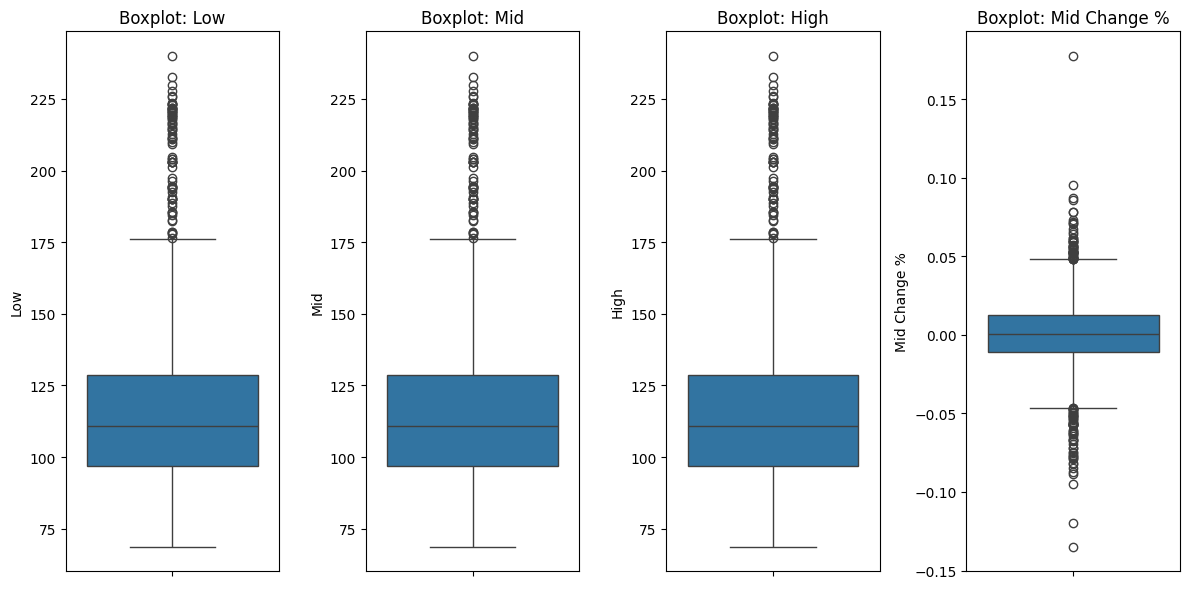

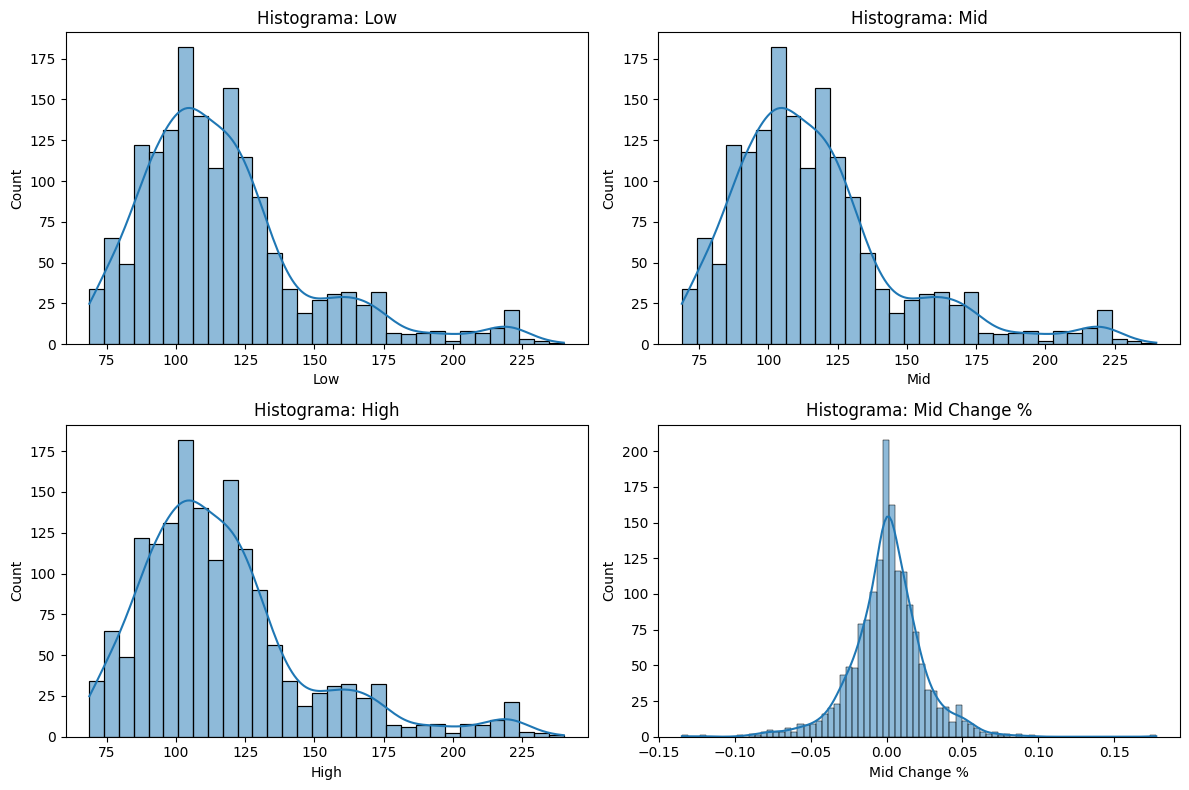

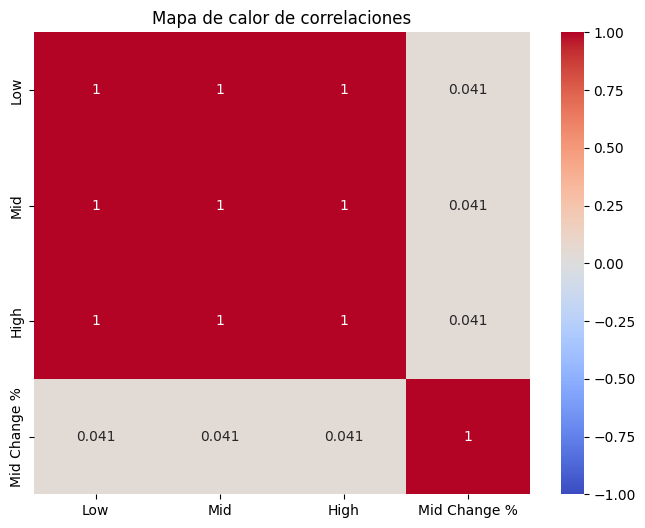

In [35]:
make_plots_cuantitativas(china)

Mismo caso que antes , como no tiene sentido seguir este analisis se reestructuran los datos

In [36]:
def pivot_china(dataframe, estado=None):
    # Convert 'Date' to datetime format
    dataframe['Date'] = pd.to_datetime(dataframe['Date'], format='%d/%m/%Y')

    # Extract month (first day of the month)
    dataframe['Mes'] = dataframe['Date'].dt.to_period('M').dt.to_timestamp()

    # Select relevant columns
    df_reduced = dataframe[['Mes', 'Tipo', 'Estado', 'Mid']]

    # Optional: filter by Estado (even though likely fixed for China)
    if estado:
        df_reduced = df_reduced[df_reduced['Estado'] == estado]

    # Pivot: rows = Mes, columns = Estado & Tipo, values = average Mid
    df_pivot = df_reduced.pivot_table(
        index='Mes',
        columns=['Estado', 'Tipo'],
        values='Mid',
        aggfunc='mean'  # Daily data → Monthly average
    ).reset_index()

    return df_pivot


In [37]:
china_month=pivot_china(china)
china_month

C:\Users\Gael\AppData\Local\Temp\ipykernel_17940\3846762669.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gael\AppData\Local\Temp\ipykernel_17940\3846762669.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Estado,Mes,China
Tipo,,Iron Ore
0,2018-08-01,71.306000
1,2018-09-01,74.237000
2,2018-10-01,77.331739
3,2018-11-01,75.965238
4,2018-12-01,71.997000
...,...,...
75,2024-11-01,102.780000
76,2024-12-01,103.897619
77,2025-01-01,101.558500


In [38]:
# Ensure Mes is a datetime index
df_long = china_month.copy() # z is a dataframe

df_long.columns = ['Mes'] + [' - '.join(col).strip() for col in df_long.columns[1:]]
df_melted = df_long.melt(id_vars='Mes', var_name='Producto', value_name='Precio')

# Plotly interactive plot
fig = px.line(
    df_melted,
    x='Mes',
    y='Precio',
    color='Producto',
    title='Precio Mensual de Chatarra en Cina',
    markers=True
)

fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Precio (USD / tonelada bruta)',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()

In [39]:
alabama.columns

MultiIndex([(    'Mes',              ''),
            ('Alabama', 'Busheling No1'),
            ('Alabama', 'Shredded Auto')],
           names=['Estado', 'Tipo'])

In [40]:
df=[alabama, chicago, china_month, mexico_month]
df

[Estado        Mes       Alabama              
 Tipo              Busheling No1 Shredded Auto
 0      2013-08-01         417.0         380.0
 1      2013-09-01         410.0         372.0
 2      2013-10-01         403.0         367.0
 3      2013-11-01         432.0         400.0
 4      2013-12-01         442.0         415.0
 ..            ...           ...           ...
 131    2024-11-01         390.0         390.0
 132    2024-12-01         380.0         380.0
 133    2025-01-01         400.0         400.0
 134    2025-02-01         440.0         440.0
 135    2025-03-01         470.0         463.0
 
 [136 rows x 3 columns],
 Estado        Mes       Chicago              
 Tipo              Busheling No1 Shredded Auto
 0      1993-01-01         116.0        113.75
 1      1993-02-01         125.0        124.00
 2      1993-03-01         124.0           NaN
 3      1993-04-01         120.0        121.00
 4      1993-05-01           NaN        120.00
 ..            ...           ... 

In [41]:
def clean_and_format(df):
    # Flatten MultiIndex columns
    df.columns = ['Date' if col[0] == 'Mes' else f"{col[0]} - {col[1]}" for col in df.columns]

    # Format 'Date' column to YYYY-MM
    df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
    
    return df

# Clean each dataframe
alabama = clean_and_format(alabama)
chicago = clean_and_format(chicago)
china_month = clean_and_format(china_month)
mexico_month = clean_and_format(mexico_month)

# Merge them all on 'Date'
df_merged = alabama.merge(chicago, on='Date', how='outer') \
                   .merge(china_month, on='Date', how='outer') \
                   .merge(mexico_month, on='Date', how='outer') \
                   .sort_values('Date').reset_index(drop=True)



In [42]:
df_merged

,Date,Alabama - Busheling No1,Alabama - Shredded Auto,Chicago - Busheling No1,Chicago - Shredded Auto,China - Iron Ore,Monterrey - Busheling No1
0,1993-01,NaN,NaN,116.0,113.75,NaN,NaN
1,1993-02,NaN,NaN,125.0,124.00,NaN,NaN
2,1993-03,NaN,NaN,124.0,NaN,NaN,NaN
3,1993-04,NaN,NaN,120.0,121.00,NaN,NaN
4,1993-05,NaN,NaN,NaN,120.00,NaN,NaN
...,...,...,...,...,...,...,...
351,2024-11,390.0,390.0,380.0,370.00,102.780000,326.25
352,2024-12,380.0,380.0,380.0,360.00,103.897619,313.00
353,2025-01,400.0,400.0,400.0,380.00,101.558500,298.75
354,2025-02,440.0,440.0,450.0,430.00,106.348000,323.75


In [49]:
# Ensure Mes is a datetime index
df_long = df_merged.copy() # z is a dataframe

df_long.columns = ['Mes'] + [''.join(col).strip() for col in df_long.columns[1:]]
df_melted = df_long.melt(id_vars='Mes', var_name='Producto', value_name='Precio')

# Plotly interactive plot
fig = px.line(
    df_melted,
    x='Mes',
    y='Precio',
    color='Producto',
    title='Precios Mensuales Industria Metalurgica  ',
    markers=True
)

fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Precio (USD / tonelada bruta)',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()

Historico , como cambia el precio del mineral de Hierro , precios de chatarra, en Alabama y Chicago , conforme pasa el tiempo, de forma mensual

In [44]:
def calcular_medidas_estadisticas(dataframe):
    # Only include numeric columns (skip Date)
    numeric_df = dataframe.select_dtypes(include='number')

    # Basic stats
    medidas_estadisticas = numeric_df.describe()

    # Lists to store new values
    modas = []
    rangos = []
    varianzas = []

    for col in numeric_df.columns:
        moda = numeric_df[col].mode()
        modas.append(moda.iloc[0] if not moda.empty else None)

        rango = numeric_df[col].max() - numeric_df[col].min()
        rangos.append(rango)

        varianza = numeric_df[col].std() ** 2
        varianzas.append(varianza)

    # Append new rows
    medidas_estadisticas.loc['Moda'] = modas
    medidas_estadisticas.loc['Rango'] = rangos
    medidas_estadisticas.loc['Varianza'] = varianzas

    return medidas_estadisticas


In [45]:
estadisticas = calcular_medidas_estadisticas(df_merged)
estadisticas


,Alabama - Busheling No1,Alabama - Shredded Auto,Chicago - Busheling No1,Chicago - Shredded Auto,China - Iron Ore,Monterrey - Busheling No1
count,133.000000,136.000000,336.000000,332.000000,80.000000,106.000000
mean,380.665414,351.698529,303.720061,276.827435,116.642991,354.050943
std,109.592889,88.642630,150.869292,125.042430,30.709546,110.753920
min,173.000000,170.000000,81.500000,79.250000,71.306000,195.500000
25%,300.000000,284.000000,157.750000,150.375000,95.527024,280.250000
50%,380.000000,365.000000,294.500000,267.000000,110.969298,321.250000
75%,430.000000,400.000000,400.000000,375.250000,126.576000,386.562500
max,740.000000,595.000000,890.000000,615.000000,216.080909,665.625000
Moda,380.000000,400.000000,380.000000,370.000000,71.306000,260.000000
Rango,567.000000,425.000000,808.500000,535.750000,144.774909,470.125000


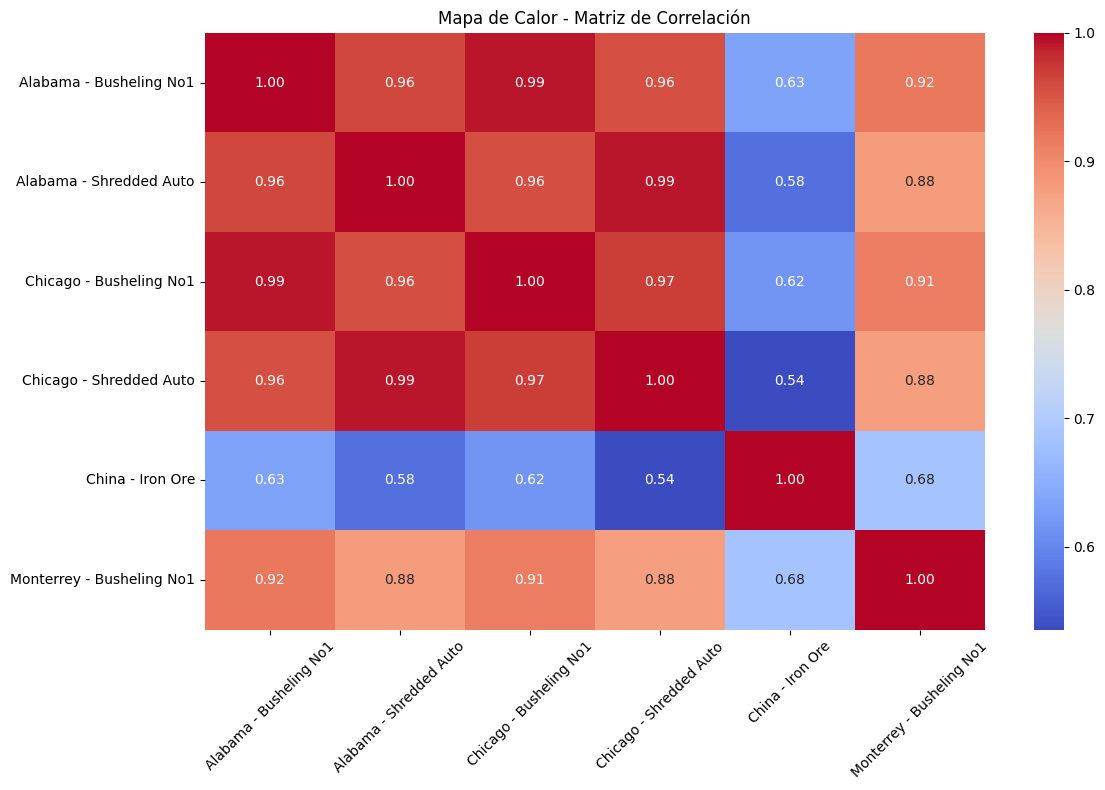

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

df_numerico = df_merged.drop(columns=['Date'], errors='ignore')


fig_box = go.Figure()

for col in df_numerico.columns:
    fig_box.add_trace(go.Box(y=df_numerico[col], name=col))

fig_box.update_layout(title="Boxplots - Detección de Outliers", height=600)
fig_box.show()



for col in df_numerico.columns:
    fig_hist = px.histogram(df_numerico, x=col, nbins=30, marginal="box",
                            title=f"Histograma de {col} con Boxplot")
    fig_hist.show()


# -------------------------------------
correlation_matrix = df_numerico.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor - Matriz de Correlación")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [47]:
df_merged.isna().sum()

Date                           0
Alabama - Busheling No1      223
Alabama - Shredded Auto      220
Chicago - Busheling No1       20
Chicago - Shredded Auto       24
China - Iron Ore             276
Monterrey - Busheling No1    250
dtype: int64

In [50]:
df_merged

,Date,Alabama - Busheling No1,Alabama - Shredded Auto,Chicago - Busheling No1,Chicago - Shredded Auto,China - Iron Ore,Monterrey - Busheling No1
0,1993-01,NaN,NaN,116.0,113.75,NaN,NaN
1,1993-02,NaN,NaN,125.0,124.00,NaN,NaN
2,1993-03,NaN,NaN,124.0,NaN,NaN,NaN
3,1993-04,NaN,NaN,120.0,121.00,NaN,NaN
4,1993-05,NaN,NaN,NaN,120.00,NaN,NaN
...,...,...,...,...,...,...,...
351,2024-11,390.0,390.0,380.0,370.00,102.780000,326.25
352,2024-12,380.0,380.0,380.0,360.00,103.897619,313.00
353,2025-01,400.0,400.0,400.0,380.00,101.558500,298.75
354,2025-02,440.0,440.0,450.0,430.00,106.348000,323.75


In [51]:
df_merged[['Año', 'Mes']] = df_merged['Date'].str.split('-', expand=True)
df_merged['Año'] = df_merged['Año'].astype(int)
df_merged['Mes'] = df_merged['Mes'].astype(int)


In [52]:
df_merged

,Date,Alabama - Busheling No1,Alabama - Shredded Auto,Chicago - Busheling No1,Chicago - Shredded Auto,China - Iron Ore,Monterrey - Busheling No1,Año,Mes
0,1993-01,NaN,NaN,116.0,113.75,NaN,NaN,1993,1
1,1993-02,NaN,NaN,125.0,124.00,NaN,NaN,1993,2
2,1993-03,NaN,NaN,124.0,NaN,NaN,NaN,1993,3
3,1993-04,NaN,NaN,120.0,121.00,NaN,NaN,1993,4
4,1993-05,NaN,NaN,NaN,120.00,NaN,NaN,1993,5
...,...,...,...,...,...,...,...,...,...
351,2024-11,390.0,390.0,380.0,370.00,102.780000,326.25,2024,11
352,2024-12,380.0,380.0,380.0,360.00,103.897619,313.00,2024,12
353,2025-01,400.0,400.0,400.0,380.00,101.558500,298.75,2025,1
354,2025-02,440.0,440.0,450.0,430.00,106.348000,323.75,2025,2


In [53]:
del df_merged['Date']

In [56]:
df_merged

,Alabama - Busheling No1,Alabama - Shredded Auto,Chicago - Busheling No1,Chicago - Shredded Auto,China - Iron Ore,Monterrey - Busheling No1,Año,Mes
0,NaN,NaN,116.0,113.75,NaN,NaN,1993,1
1,NaN,NaN,125.0,124.00,NaN,NaN,1993,2
2,NaN,NaN,124.0,NaN,NaN,NaN,1993,3
3,NaN,NaN,120.0,121.00,NaN,NaN,1993,4
4,NaN,NaN,NaN,120.00,NaN,NaN,1993,5
...,...,...,...,...,...,...,...,...
351,390.0,390.0,380.0,370.00,102.780000,326.25,2024,11
352,380.0,380.0,380.0,360.00,103.897619,313.00,2024,12
353,400.0,400.0,400.0,380.00,101.558500,298.75,2025,1
354,440.0,440.0,450.0,430.00,106.348000,323.75,2025,2


# Interpolacion de datos forma linear


In [57]:
for col in df_merged.select_dtypes(include='number').columns:
    primer_dato_idx = df_merged[col].first_valid_index()
    df_merged.loc[primer_dato_idx:, col] = df_merged.loc[primer_dato_idx:, col].interpolate()


In [58]:
df_merged

,Alabama - Busheling No1,Alabama - Shredded Auto,Chicago - Busheling No1,Chicago - Shredded Auto,China - Iron Ore,Monterrey - Busheling No1,Año,Mes
0,NaN,NaN,116.0,113.75,NaN,NaN,1993,1
1,NaN,NaN,125.0,124.00,NaN,NaN,1993,2
2,NaN,NaN,124.0,122.50,NaN,NaN,1993,3
3,NaN,NaN,120.0,121.00,NaN,NaN,1993,4
4,NaN,NaN,122.0,120.00,NaN,NaN,1993,5
...,...,...,...,...,...,...,...,...
351,390.0,390.0,380.0,370.00,102.780000,326.25,2024,11
352,380.0,380.0,380.0,360.00,103.897619,313.00,2024,12
353,400.0,400.0,400.0,380.00,101.558500,298.75,2025,1
354,440.0,440.0,450.0,430.00,106.348000,323.75,2025,2


In [59]:
df_merged2= df_merged[df_merged["Año"]>=2014]
df_merged2

,Alabama - Busheling No1,Alabama - Shredded Auto,Chicago - Busheling No1,Chicago - Shredded Auto,China - Iron Ore,Monterrey - Busheling No1,Año,Mes
222,423.5,430.0,440.0,438.0,NaN,NaN,2014,1
223,405.0,395.0,408.0,408.0,NaN,NaN,2014,2
224,390.0,382.0,388.0,388.0,NaN,NaN,2014,3
225,405.0,395.0,399.0,398.0,NaN,NaN,2014,4
226,405.5,385.0,397.0,383.0,NaN,NaN,2014,5
...,...,...,...,...,...,...,...,...
351,390.0,390.0,380.0,370.0,102.780000,326.25,2024,11
352,380.0,380.0,380.0,360.0,103.897619,313.00,2024,12
353,400.0,400.0,400.0,380.0,101.558500,298.75,2025,1
354,440.0,440.0,450.0,430.0,106.348000,323.75,2025,2


# Analisis despues de imputar valores nulos y filtrar para fechas que solo nos son de interes

In [63]:
estadisticas = calcular_medidas_estadisticas(df_merged2)
estadisticas


,Alabama - Busheling No1,Alabama - Shredded Auto,Chicago - Busheling No1,Chicago - Shredded Auto,China - Iron Ore,Monterrey - Busheling No1,Año,Mes
count,134.000000,134.000000,134.000000,134.000000,80.000000,106.000000,134.000000,134.00000
mean,379.000000,349.645522,377.705224,348.444030,116.642991,354.050943,2019.171642,6.38806
std,109.347159,89.323535,115.639253,95.705525,30.709546,110.753920,3.243330,3.50276
min,173.000000,170.000000,160.000000,160.000000,71.306000,195.500000,2014.000000,1.00000
25%,300.000000,281.000000,290.000000,271.250000,95.527024,280.250000,2016.000000,3.00000
50%,380.000000,363.000000,375.000000,355.000000,110.969298,321.250000,2019.000000,6.00000
75%,420.625000,400.000000,420.000000,413.250000,126.576000,386.562500,2022.000000,9.00000
max,740.000000,595.000000,760.000000,615.000000,216.080909,665.625000,2025.000000,12.00000
Moda,380.000000,400.000000,380.000000,370.000000,71.306000,260.000000,2015.000000,1.00000
Rango,567.000000,425.000000,600.000000,455.000000,144.774909,470.125000,11.000000,11.00000


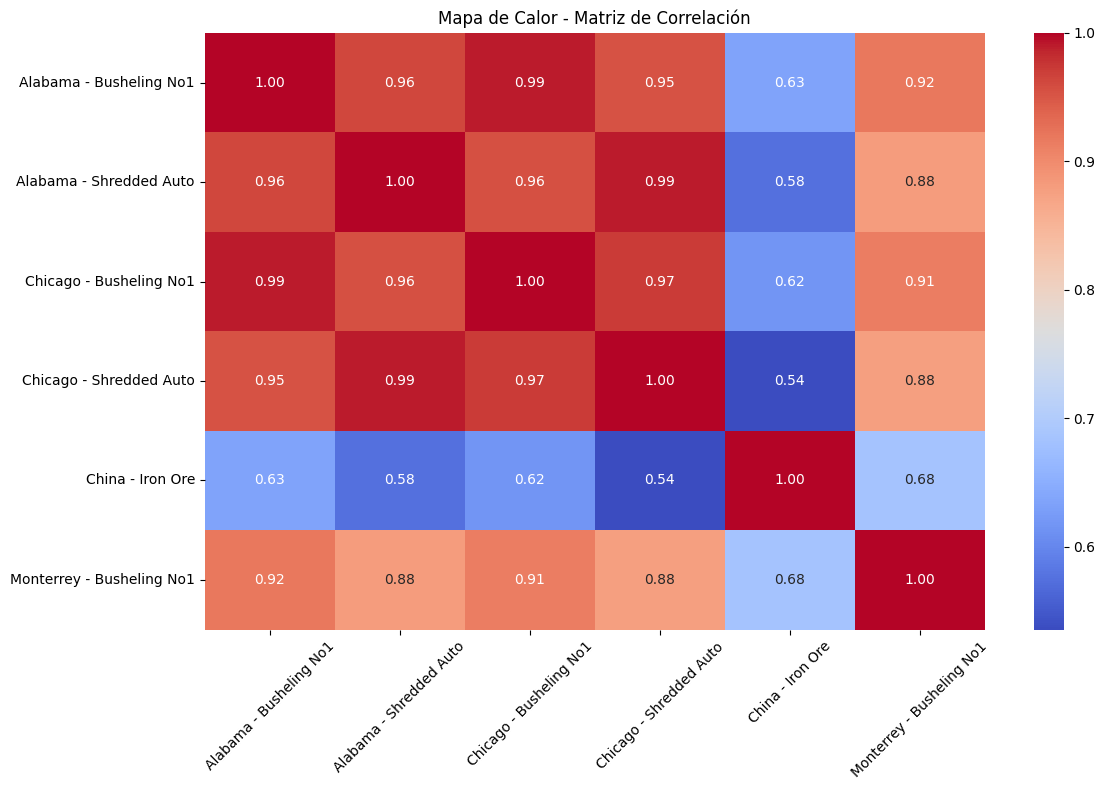

In [65]:
df_numerico = df_merged.drop(columns=['Año',"Mes"], errors='ignore')


fig_box = go.Figure()

for col in df_numerico.columns:
    fig_box.add_trace(go.Box(y=df_numerico[col], name=col))

fig_box.update_layout(title="Boxplots - Detección de Outliers", height=600)
fig_box.show()



for col in df_numerico.columns:
    fig_hist = px.histogram(df_numerico, x=col, nbins=30, marginal="box",
                            title=f"Histograma de {col} con Boxplot")
    fig_hist.show()


# -------------------------------------
correlation_matrix = df_numerico.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor - Matriz de Correlación")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Los precios de chatarra presentan una correlacion muy fuerte , una posible razón por la que los precios de la chatarra presentan una correlación lineal muy fuerte es que todos dependen de un mismo factor externo, como el precio internacional de los metales. Cuando sube o baja ese precio base, afecta de manera similar a todos los tipos de chatarra, haciendo que sus valores se muevan casi al mismo ritmo. Sin embargo esto difiere un poco del mineral de hierro ya que su correlacion no es tan alta con la de la chatarra 

In [62]:
df_merged2.to_csv("Precio_chatarra_mes.csv",encoding="latin")